<a href="https://colab.research.google.com/github/ehpub/kfq_ML_2023/blob/main/kfq2013_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%9A%8C%EA%B7%80(%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_internal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [4]:
x = np.arange(-10,10,0.1)
y = np.array( [ 3*e + 7 + np.random.normal(0,6) for e in x ] )

In [5]:
import matplotlib.pyplot as plt

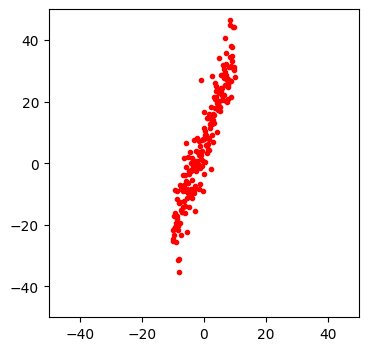

In [10]:
plt.figure(figsize=(4,4))
plt.plot(x,y,'r.')
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.show()

In [11]:
def mse(actual,pred):
  return np.sum((actual-pred)**2)/len(actual)

In [15]:
b= 7
w = 2
pr = np.array([w *e + b for e in x])
mse(y,pr)

70.6093652304464

In [16]:
w=3
pr = np.array([w *e + b for e in x])
mse(y,pr)

40.974547683893086

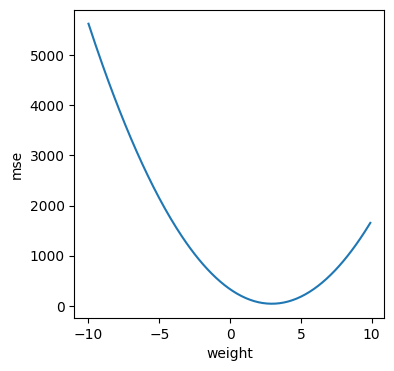

In [18]:
b= 7
wl = np.arange(-10,10,0.1)
pl = np.array([[w *e + b for e in x] for w in wl])
mses =np.array([ mse(y,p) for p in pl])
plt.figure(figsize=(4,4))
plt.plot(wl,mses)
plt.xlabel('weight')
plt.ylabel('mse')
plt.show()

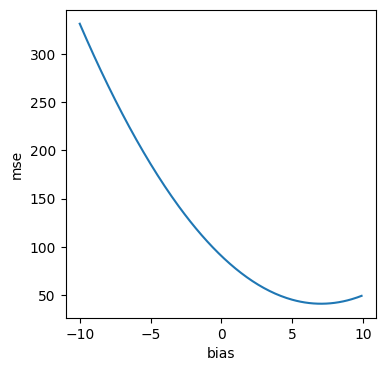

In [19]:
w= 3
bl = np.arange(-10,10,0.1)
pl = np.array([[w *e + b for e in x] for b in bl])
mses =np.array([ mse(y,p) for p in pl])
plt.figure(figsize=(4,4))
plt.plot(wl,mses)
plt.xlabel('bias')
plt.ylabel('mse')
plt.show()

In [38]:
def gradient(x,y,w,b):
  pred = w*x + b
  error = y - pred
  n = len(y)
  wg = -2*sum(x*error)/n
  bg = -2*sum(error)/n
  return wg,bg,mse(y,pred)

In [39]:
gradient(x,y,0,7)

(-196.30981754655213, 0.21820769883327723, 329.88900032355167)

In [40]:
gradient(x,y,1,7)

(-129.63981754655254, 0.118207698833208, 166.91418277699927)

In [41]:
gradient(x,y,2,7)

(-62.96981754655309, 0.01820769883313261, 70.6093652304464)

In [42]:
gradient(x,y,3,7)

(3.7001824534464567, -0.08179230116693695, 40.974547683893086)

In [43]:
gradient(x,y,2.9,7)

(-2.966817546553504, -0.07179230116692988, 40.937879438548435)

In [44]:
gradient(x,y,2.95,7)

(0.36668245344648925, -0.0767923011669335, 40.872876061220765)

In [45]:
gradient(x,y,2.948,7)

(0.23334245344647678, -0.07659230116693347, 40.87227603631387)

In [46]:
gradient(x,y,2.947,7)

(0.16667245344647738, -0.07649230116693363, 40.87207602886043)

In [47]:
gradient(x,y,2.946,7)

(0.10000245344649414, -0.07639230116693305, 40.87194269140698)

In [48]:
gradient(x,y,2.945,7)

(0.03333245344646926, -0.07629230116693343, 40.871876023953526)

In [55]:
def gradient_desent(x,y,lr=0.001):
  w = np.random.uniform(-1,1)
  b = np.random.uniform(-10,10)
  hist=[]
  for i in range(10000):
    wg,bg,r = gradient(x,y,w,b)
    if (i<5)|(i%100==0):
      hist.append([i,round(w,3),round(wg,3),round(b,3),round(bg,3),r])
    w = w - wg*lr
    b = b - bg*lr
  return w,b,hist

In [56]:
w,b,hist = gradient_desent(x,y)
w,b

(2.944557221305672, 7.038123979937072)

In [57]:
hist

[[0, -0.468, -225.919, -8.63, -30.995, 669.1239993924926],
 [1, -0.242, -210.86, -8.599, -30.956, 618.8255440327148],
 [2, -0.031, -196.805, -8.568, -30.915, 574.8877382080134],
 [3, 0.166, -183.687, -8.537, -30.873, 536.4912132856422],
 [4, 0.35, -171.444, -8.506, -30.83, 502.92221152309327],
 [100, 2.921, -0.267, -5.792, -25.658, 205.4683330308405],
 [200, 2.928, -0.033, -3.464, -21.003, 151.16267252882008],
 [300, 2.931, -0.027, -1.559, -17.193, 114.77421003435938],
 [400, 2.934, -0.022, 0.001, -14.074, 90.39130644962871],
 [500, 2.936, -0.018, 1.277, -11.52, 74.05299626905345],
 [600, 2.937, -0.015, 2.323, -9.43, 63.105145918537545],
 [700, 2.939, -0.012, 3.178, -7.72, 55.769293803317716],
 [800, 2.94, -0.01, 3.878, -6.319, 50.85374193391901],
 [900, 2.941, -0.008, 4.452, -5.173, 47.559966405017846],
 [1000, 2.941, -0.007, 4.921, -4.234, 45.35289840471303],
 [1100, 2.942, -0.005, 5.305, -3.466, 43.87400310197384],
 [1200, 2.942, -0.004, 5.619, -2.837, 42.883036210078316],
 [1300, 2

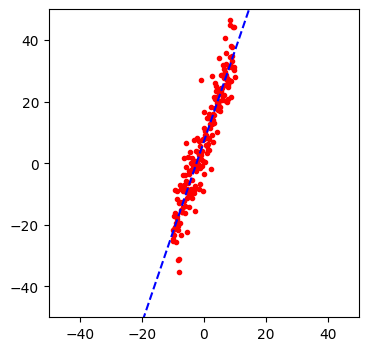

In [59]:
plt.figure(figsize=(4,4))
plt.plot(x,y,'r.')
plt.plot([-50,50],[-50*w+b, 50*w+b],'b--')
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.show()

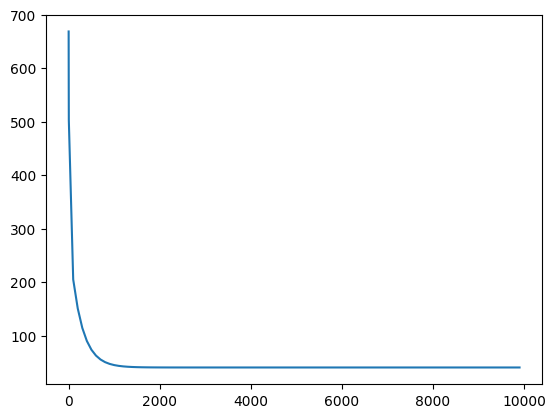

In [73]:
xi = [i for i,_,_,_,_,_ in hist]
rl = [r for _,_,_,_,_,r in hist]
plt.plot(xi,rl)
plt.show()

In [65]:
from sklearn.linear_model import LinearRegression

In [69]:
import pandas as pd

In [70]:
path = "/content/drive/MyDrive/mldata/Boston_house.csv"

In [71]:
df = pd.read_csv(path)
df

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [76]:
import seaborn as sns

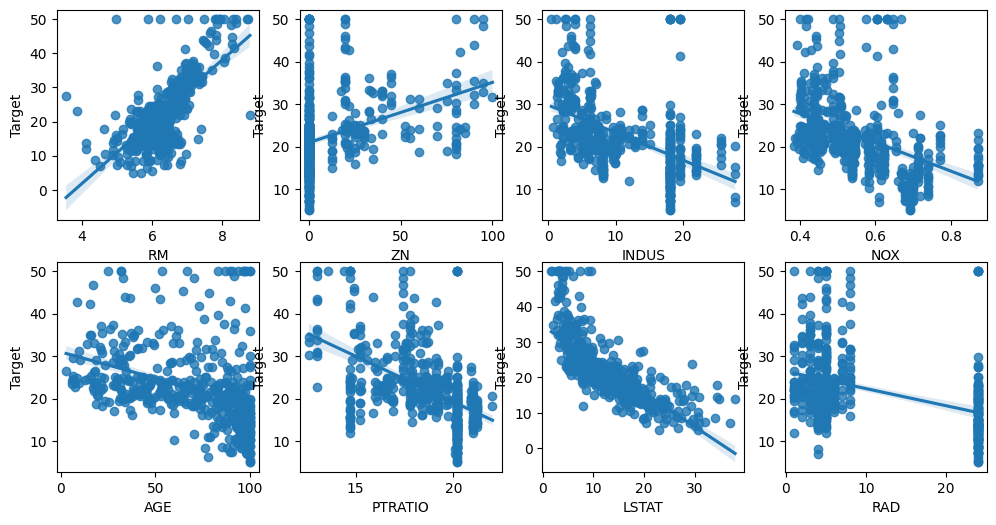

In [77]:
fig,axs = plt.subplots(ncols=4,nrows=2,figsize=(12,6))
features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(features):
  row = int(i/4)
  col = i%4
  sns.regplot(x=feature,y='Target',data=df,ax=axs[row][col])
plt.show()

In [78]:
data = df.drop('Target',axis=1)
label = df['Target']

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test = train_test_split(data,label)

In [81]:
model = LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
model.score(x_test,y_test)

0.7931044167754109

In [82]:
from sklearn.metrics import r2_score

In [83]:
r2_score(y_test,pred)

0.7931044167754109

In [84]:
from sklearn.metrics import mean_squared_error

In [85]:
mean_squared_error(y_test,pred)

18.200137918207584

In [86]:
mse(y_test,pred)

18.200137918207584

In [87]:
np.sqrt(mse(y_test,pred))

4.266161965772934

In [88]:
model.intercept_

35.550366106040485

In [89]:
model.coef_

array([ 8.86691158e-03,  1.05373838e-02,  3.74838313e+00, -1.39909454e-01,
       -1.51271770e+00,  2.21378680e-02, -5.55302536e-01, -1.71425108e+01,
       -9.05334299e-01,  3.92209042e-01,  5.35721327e-02, -1.54203344e-02,
        2.80634323e+00])

In [94]:
x0 = data.iloc[0]
s = 0
for i  in range(len(x0)):
  s += x0[i] * model.coef_[i]
s += model.intercept_
print(s)

29.772030521658927


In [95]:
xt0 = [x0]
model.predict(xt0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([29.77203052])